<a href="https://colab.research.google.com/github/biteforceee/probability-theory-and-mathematical-statistics/blob/main/Find_substring_in_string.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Поиск строки в последовательности
Задание.
1.   Получить случайную последовательность заданной длины N >> 1.
2.   Ввести короткую строку для поиска. Найти число вхождений данной строки в
исходную последовательность.
3.   Построить ряд распределения для числа вхождений, найти выборочное среднее
и выборочную дисперсию.

**Случайная последовательность из игры «камень, ножницы, бумага»**

In [ ]:
def count_substring_occurrences(string, substring):
    count = 0
    for i in range(len(string) - len(substring) + 1):
        if string[i:i + len(substring)] == substring:
            count += 1
    return count

In [ ]:
'''
3 разных 10000
Выборочное среднее (x): 370.284
Выборочная дисперсия (S^2): 287.18534400000004

5 разных 10000
Выборочное среднее (x): 41.238
Выборочная дисперсия (S^2): 40.30335599999995

3 одинаковых
Выборочное среднее (x): 370.127
Выборочная дисперсия (S^2): 604.0968709999999

5 одинаковых
Выборочное среднее (x): 41.26
Выборочная дисперсия (S^2): 77.58240000000009

'''

In [ ]:
import random
import math
import pandas as pd
from scipy import integrate
from collections import Counter

## задание 3 ##
## 6 вариант ##

words = {1: 'камень', 2: 'ножницы', 3: 'бумага'}

N = int(input("введите количество слов в строке: "))
poisk = input("введите строку для поиска: ")


num_experiments = 1000  # Количество экспериментов

distribution = Counter()  # Для хранения распределения

occurrences_list = []

for _ in range(num_experiments):
    stroka = ""
    for _ in range(N):
        a = random.randint(1, 3)
        stroka += words[a] + " "

    occurrences = count_substring_occurrences(stroka, poisk)
    distribution[occurrences] += 1
    occurrences_list.append(occurrences)

sorted_distribution = sorted(distribution.items(), key=lambda item: item[0])
pd = pd.DataFrame(sorted_distribution, columns=['число вхождений', 'частота'])
pd['частота'] = pd['частота'] / num_experiments

sample_mean = sum(occurrences_list) / len(occurrences_list)

sample_variance = sum([(x - sample_mean)**2 for x in occurrences_list]) / len(occurrences_list)

print("\nВыборочное среднее (x):", sample_mean)
print("Выборочная дисперсия (S^2):", sample_variance)

#covariance = sum([(occurrences_list[i] - mean_occurrences) * (random_variable_list[i] - mean_random_variable)
                 # for i in range(len(occurrences_list))]) / len(occurrences_list)

#print("Covariance:", covariance)

введите количество слов в строке: 10000
введите строку для поиска: камень ножницы бумага

Выборочное среднее (x): 371.14
Выборочная дисперсия (S^2): 308.15840000000003


In [ ]:
pd.T

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
число вхождений,308.000,315.000,320.000,321.000,322.000,324.000,326.000,327.000,329.000,330.000,...,410.000,412.000,414.000,415.000,416.000,417.000,419.000,420.000,421.000,423.000
частота,0.001,0.001,0.002,0.001,0.001,0.001,0.001,0.002,0.001,0.001,...,0.002,0.001,0.001,0.002,0.001,0.002,0.001,0.001,0.001,0.001


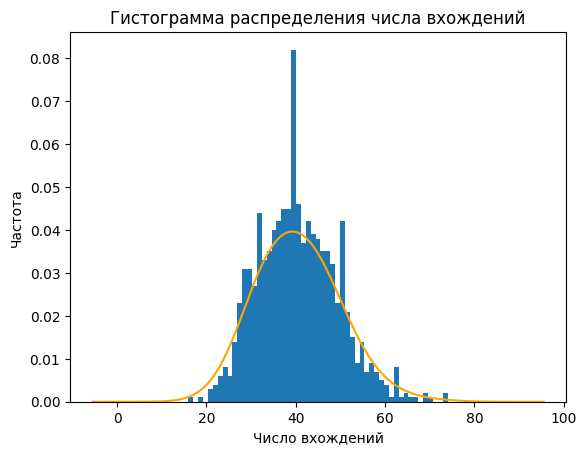

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
4 одинаковых 10000
Выборочное среднее (x): 123.076
Выборочная дисперсия (S^2): 236.7202239999995


5 одинаковых 10000
Выборочное среднее (x): 40.485
Выборочная дисперсия (S^2): 78.32777499999995
показано для 5
'''

plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

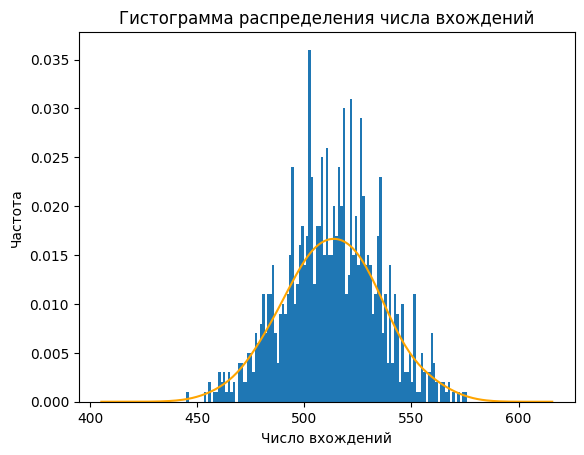

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
3 одинаковых 20000
Выборочное среднее (x): 513.015
Выборочная дисперсия (S^2): 475.4987750000006
'''

plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

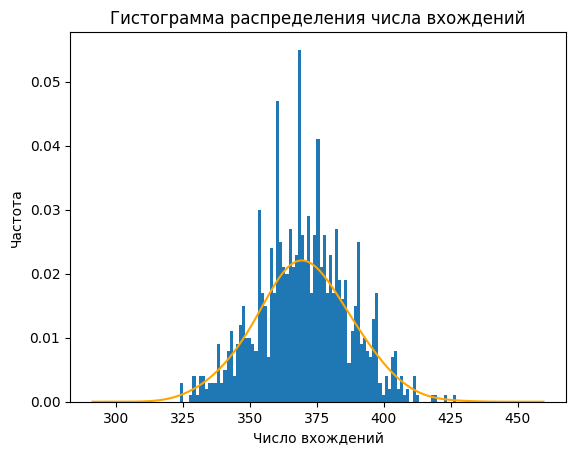

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

'''
3 разных 10000
Выборочное среднее (x): 370.224
Выборочная дисперсия (S^2): 284.29182399999934
'''

plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

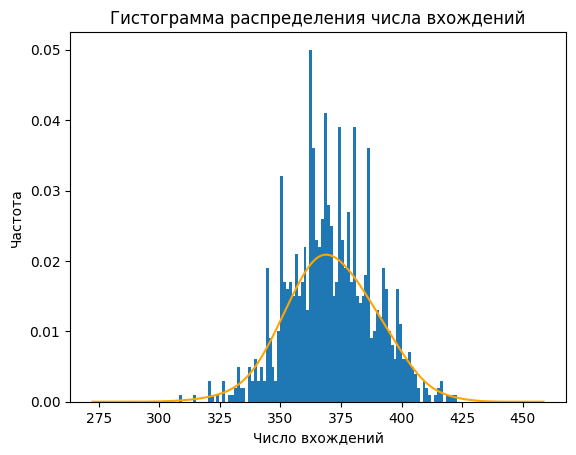

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
введите количество слов в строке: 20000
введите строку для поиска: бумага бумага бумага

Выборочное среднее (x): 740.143
Выборочная дисперсия (S^2): 1234.1565509999996
'''
plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

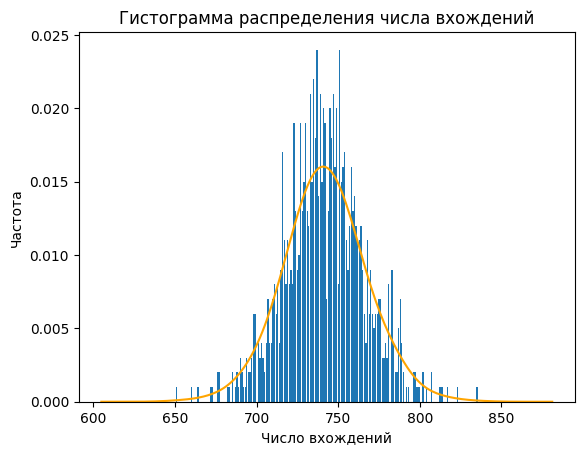

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
введите количество слов в строке: 20000
введите строку для поиска: ножницы бумага камень

Выборочное среднее (x): 741.775
Выборочная дисперсия (S^2): 591.846375

'''
plt.bar(pd['число вхождений'], pd['частота'])
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()

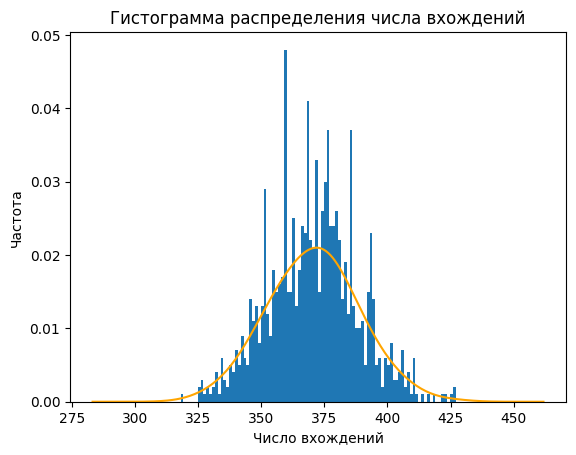

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
3 одинаковых 10000
введите строку для поиска: ножницы бумага камень

Выборочное среднее (x): 370.647
Выборочная дисперсия (S^2): 307.08839099999994

'''
plt.hist(pd['число вхождений'], weights=pd['частота'], bins=pd['число вхождений'].nunique())
sns.kdeplot(x=pd['число вхождений'], weights=pd['частота'], color = 'orange')

plt.xlabel('Число вхождений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения числа вхождений')

plt.show()